<a href="https://colab.research.google.com/github/Jeongyoon-Jang/SOLUX_image-data-analysis/blob/main/Image_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_8668.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_6580.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_5066.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_8205.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_3610.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_8896.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_3744.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_4051.jpg
/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/시장 골목길_0_1960.jpg
/content/drive/MyDr

### 디렉토리와 jpeg 파일명을 읽어서 파일의 절대경로 위치와 학습/테스트 데이터 셋 여부, 해당 이미지의 label 값을 설정

In [ ]:
paths = []
dataset_gubuns = []
label_gubuns = []
# os.walk()를 이용하여 특정 디렉토리 밑에 있는 모든 하위 디렉토리를 모두 조사. 
# cat-and-dog 하위 디렉토리 밑에 jpg 확장자를 가진 파일이 모두 이미지 파일임
# cat-and-dog 밑으로 /train/, /test/ 하위 디렉토리 존재(학습, 테스트 용 이미지 파일들을 가짐)

for dirname, _, filenames in os.walk('/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종'):
    for filename in filenames:
        # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
        if '.jpg' in filename:
            # 파일의 절대 경로를 file_path 변수에 할당. 
            file_path = dirname+'/'+ filename
            paths.append(file_path)
            # 파일의 절대 경로에 training_set, test_set가 포함되어 있으면 데이터 세트 구분을 'train'과 'test'로 분류. 
            if '/training_set/' in file_path:
                dataset_gubuns.append('train')  
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test')
            else: dataset_gubuns.append('N/A')
            
            # 파일의 절대 경로에 dogs가 있을 경우 해당 파일은 dog 이미지 파일이고, cats일 경우는 cat 이미지 파일임. 
            if 'safe_place' in file_path:
                label_gubuns.append('SAFE')
            elif 'dangerous_place' in file_path:
                label_gubuns.append('DANGEROUS')
            else: label_gubuns.append('N/A')

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
from PIL import Image

# 이미지 파일 형식 처리
for img_p in paths:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
paths[:10] , dataset_gubuns[:10], label_gubuns[:10]

(['/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8597.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3831.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8247.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3708.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3841.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3092.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8845.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_4873.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3662.jpg',
  '/content/drive/MyDrive/SOLUX_21-1_

### 위에서 생성된 이미지 파일의 절대 경로, 데이터 세트 구분, Lable값을 DataFrame으로 생성. 

In [ ]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print('data_df shape:', data_df.shape)
data_df.head(10)

data_df shape: (5439, 3)


,path,dataset,label
0,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8597.jpg,train,DANGEROUS
1,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3831.jpg,train,DANGEROUS
2,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8247.jpg,train,DANGEROUS
3,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3708.jpg,train,DANGEROUS
4,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3841.jpg,train,DANGEROUS
5,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3092.jpg,train,DANGEROUS
6,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8845.jpg,train,DANGEROUS
7,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_4873.jpg,train,DANGEROUS
8,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3662.jpg,train,DANGEROUS
9,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_1565.jpg,train,DANGEROUS


In [ ]:
# 데이터 세트값 분포 및 Label 값 분포를 확인한다. 
print(data_df['dataset'].value_counts())
print(data_df['label'].value_counts())

train    4439
test     1000
Name: dataset, dtype: int64
DANGEROUS    2973
SAFE         2466
Name: label, dtype: int64


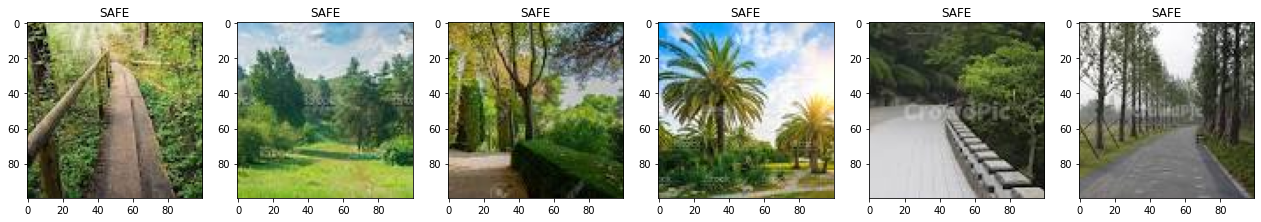

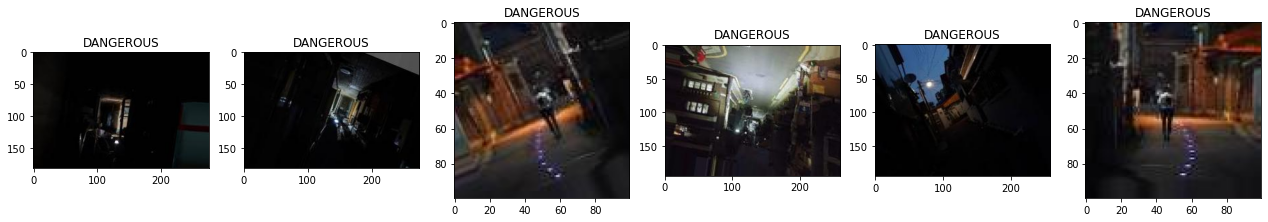

In [ ]:
# SAFE와 DANGEROUS의 이미지 파일 절대 경로를 cv2.imread()로 읽어서 image array로 로드하고 이미지 시각화
# 이미지별로 서로 다른 이미지 사이즈를 가지고 있음. 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)  
        
safe_image_list = data_df[data_df['label']=='SAFE']['path'].iloc[:6].tolist()
show_grid_images(safe_image_list, ncols=6, title='SAFE')

dangerous_image_list = data_df[data_df['label']=='DANGEROUS']['path'].iloc[:6].tolist()
show_grid_images(dangerous_image_list, ncols=6, title='DANGEROUS')

In [ ]:
for image_path in safe_image_list:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    print('image shape:', image.shape)
    
print('image height shape:', image[:, 0, 0].shape)
print('image width shape:', image[0, :, 0].shape)
print('image size:', image[:, :, 0].shape)

print('### image array:\n', image)

image shape: (100, 100, 3)
image shape: (100, 100, 3)
image shape: (100, 100, 3)
image shape: (100, 100, 3)
image shape: (100, 100, 3)
image shape: (100, 100, 3)
image height shape: (100,)
image width shape: (100,)
image size: (100, 100)
### image array:
 [[[155 155 147]
  [151 151 143]
  [120 120 112]
  ...
  [137 147 138]
  [ 36  46  37]
  [ 72  82  73]]

 [[200 200 192]
  [194 194 186]
  [192 192 184]
  ...
  [ 73  83  74]
  [ 54  64  55]
  [ 82  92  83]]

 [[255 255 248]
  [133 133 125]
  [147 147 139]
  ...
  [ 58  68  57]
  [ 85  95  84]
  [ 87  97  86]]

 ...

 [[119 118 116]
  [123 122 120]
  [127 126 124]
  ...
  [ 79  77  54]
  [ 68  66  41]
  [ 67  65  40]]

 [[127 126 124]
  [125 124 122]
  [124 123 121]
  ...
  [ 90  88  65]
  [ 70  68  43]
  [ 60  58  33]]

 [[131 130 128]
  [122 121 119]
  [116 115 113]
  ...
  [106 104  81]
  [ 84  82  59]
  [ 71  69  44]]]


### ImageDataGenerator 객체와 flow_from_dataframe()

### 이미지 파일의 절대경로 위치와 데이터세트 유형, label값을 가지는 메타 테이블용 DataFrame을 생성. 

In [ ]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print(data_df['dataset'].value_counts())
data_df.head(10)

train    4439
test     1000
Name: dataset, dtype: int64


,path,dataset,label
0,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8597.jpg,train,DANGEROUS
1,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3831.jpg,train,DANGEROUS
2,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8247.jpg,train,DANGEROUS
3,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3708.jpg,train,DANGEROUS
4,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3841.jpg,train,DANGEROUS
5,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3092.jpg,train,DANGEROUS
6,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_8845.jpg,train,DANGEROUS
7,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_4873.jpg,train,DANGEROUS
8,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_3662.jpg,train,DANGEROUS
9,/content/drive/MyDrive/SOLUX_21-1_DIVA/images_최종/training_set/dangerous_place/골목밤길_0_1565.jpg,train,DANGEROUS


### 학습용/검증용/테스트용 DataFrame 을 생성

In [ ]:
data_df['dataset']=='train'

0        True
1        True
2        True
3        True
4        True
        ...  
5434    False
5435    False
5436    False
5437    False
5438    False
Name: dataset, Length: 5439, dtype: bool

In [ ]:
train_df = data_df[data_df['dataset']=='train']
test_df = data_df[data_df['dataset']=='test']
print('train_df shape:', train_df.shape, 'test_df shape:', test_df.shape)

train_df shape: (4439, 3) test_df shape: (1000, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# scikit learn의 train_test_split()을 이용하여 train용, validation용 DataFrame을 생성
# stratify를 이용하여 label 값을 균등하게 분할 
tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2021)
print('tr_df shape:', tr_df.shape, 'val_df shape:', val_df.shape)
print('tr_df label distribution:\n', tr_df['label'].value_counts())
print('val_df label distributuion:\n', val_df['label'].value_counts())

tr_df shape: (3773, 3) val_df shape: (666, 3)
tr_df label distribution:
 DANGEROUS    2102
SAFE         1671
Name: label, dtype: int64
val_df label distributuion:
 DANGEROUS    371
SAFE         295
Name: label, dtype: int64


### 학습과 검증용 ImageDataGenerator 생성

In [ ]:
# IMAGE 크기와 BATCH 크기를 위한 환경 변수 설정. 
IMAGE_SIZE = 224
BATCH_SIZE = 64

### 학습용 ImageDataGenerator 생성과 Data generator 처리

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 학습용과 검증용 ImageDataGenerator 생성. 학습용은 augmentation + rescale적용. 검증용은 rescale만 적용 
# augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용. 
tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)

# ImageDataGenerator 객체의 flow_from_dataframe() 메소드를 호출. 
# flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
# x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
# y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
# y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
# softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 
tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동 Encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=True
                                      )

Found 3773 validated image filenames belonging to 2 classes.


In [ ]:
# next()를 flow_from_directory()로 반환된 Iterator 객체를 강제로 호출하여 어떤 값이 만들어 지는지 확인.  
# 튜플형태로 반환되고 튜플의 첫번째값은 image array, 두번째 값은 label array 임
# image array는 0~1 사이 값인 float32로 변환됨. label array는 2개 column으로 원-핫 인코딩 됨. 
# next(iter(train_flow_gen))
#images_array, labels_array = next(train_flow_gen)
#print(images_array.shape, labels_array.shape)
#print(images_array[:1], labels_array[:1])
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)
print(images_array[0])
print(labels_array[0])

##### image array shape: (64, 224, 224, 3)
#### label array shape: (64,)
[[[0.14509805 0.10980393 0.07450981]
  [0.14901961 0.1137255  0.07843138]
  [0.14901961 0.1137255  0.07843138]
  ...
  [0.00392157 0.01176471 0.00784314]
  [0.         0.01176471 0.00784314]
  [0.         0.01568628 0.01176471]]

 [[0.14509805 0.10980393 0.07450981]
  [0.14901961 0.1137255  0.07843138]
  [0.14901961 0.1137255  0.07843138]
  ...
  [0.00392157 0.01176471 0.00784314]
  [0.         0.01176471 0.00784314]
  [0.         0.01568628 0.01176471]]

 [[0.14509805 0.10980393 0.07450981]
  [0.14901961 0.1137255  0.07843138]
  [0.14901961 0.1137255  0.07843138]
  ...
  [0.00392157 0.01176471 0.00784314]
  [0.         0.01176471 0.00784314]
  [0.         0.01568628 0.01176471]]

 ...

 [[0.20784315 0.21176472 0.18039216]
  [0.25882354 0.25882354 0.21960786]
  [0.2627451  0.2509804  0.21568629]
  ...
  [0.09803922 0.0627451  0.06666667]
  [0.10196079 0.06666667 0.07058824]
  [0.10196079 0.06666667 0.07058824]]

 

### 검증용 ImageDataGenerator 생성과 Data generator 처리



In [ ]:
# 검증용 ImageDataGenerator는 rescale만 적용. 
val_generator = ImageDataGenerator(rescale=1/255.)
val_flow_gen = val_generator.flow_from_dataframe(dataframe=val_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

Found 666 validated image filenames belonging to 2 classes.


### 모델 생성

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 최종 output 출력을 softmax에서 sigmoid로 변환. 
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [ ]:
model = create_model(model_name='xception')
# 최종 output 출력을 softmax에서 sigmoid로 변환되었으므로 binary_crossentropy로 변환 
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
# 5번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

### fit() 또는 fit_generator() 호출하여 학습 수행.
* validation_data에는 앞에서 검증용으로 생성한 val_generator를 입력
* validation_steps는 검증용 데이터에 대한 steps_per_epoch임. 

In [ ]:
# 학습과 검증용 steps_per_epoch 계산 
N_EPOCHS = 15

model.fit(tr_flow_gen, epochs=N_EPOCHS,
          steps_per_epoch=int(np.ceil(tr_df.shape[0]/BATCH_SIZE)),
          validation_data=val_flow_gen, 
          validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)), 
          callbacks=[rlr_cb, ely_cb])

Epoch 1/15
59/59 [==============================] - 77s 1s/step - loss: 0.1684 - accuracy: 0.9353 - val_loss: 37.9901 - val_accuracy: 0.4505
Epoch 2/15
59/59 [==============================] - 76s 1s/step - loss: 0.0628 - accuracy: 0.9764 - val_loss: 26.7580 - val_accuracy: 0.4640
Epoch 3/15
59/59 [==============================] - 78s 1s/step - loss: 0.0448 - accuracy: 0.9854 - val_loss: 1.8656 - val_accuracy: 0.7673
Epoch 4/15
59/59 [==============================] - 79s 1s/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.1273 - val_accuracy: 0.9685
Epoch 5/15
59/59 [==============================] - 79s 1s/step - loss: 0.0426 - accuracy: 0.9846 - val_loss: 0.1408 - val_accuracy: 0.9565
Epoch 6/15
59/59 [==============================] - 80s 1s/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.1322 - val_accuracy: 0.9610
Epoch 7/15
59/59 [==============================] - 81s 1s/step - loss: 0.0161 - accuracy: 0.9939 - val_loss: 0.4045 - val_accuracy: 0.9505

Epoch 00007: Redu

In [ ]:
# 학습한 모델 저장
model.save(r"/content/drive/My Drive/model/class_1.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model(r'/content/drive/My Drive/model/class_1.h5')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

### 테스트용 ImageDataGenerator 생성과 Data generator 처리 후 Evaluation 수행

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# test data는 augmentation을 적용할 필요 없음. 
test_generator = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )
# evaluation으로 성능 검증
model.evaluate(test_flow_gen)

Found 1000 validated image filenames belonging to 2 classes.
16/16 [==============================] - 5s 275ms/step - loss: 0.0353 - accuracy: 0.9860


[0.035309795290231705, 0.9860000014305115]

In [ ]:
# 각 이미지에 대해 SAFE/DANGEROUS 확인
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  print(images)
  

  classes = model.predict(images, batch_size=64)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is safe")
  else:
    print(fn + " is dangerous")


Saving t_dangerous41.jpg to t_dangerous41.jpg
[[[[15.  6.  7.]
   [15.  6.  7.]
   [15.  6.  7.]
   ...
   [ 6.  5.  3.]
   [ 6.  5.  3.]
   [ 6.  5.  3.]]

  [[15.  6.  7.]
   [15.  6.  7.]
   [15.  6.  7.]
   ...
   [ 6.  5.  3.]
   [ 6.  5.  3.]
   [ 6.  5.  3.]]

  [[15.  6.  7.]
   [15.  6.  7.]
   [15.  6.  7.]
   ...
   [ 6.  5.  3.]
   [ 6.  5.  3.]
   [ 6.  5.  3.]]

  ...

  [[72. 46. 31.]
   [72. 46. 31.]
   [72. 49. 33.]
   ...
   [15. 15.  7.]
   [16. 16.  8.]
   [16. 16.  8.]]

  [[71. 45. 30.]
   [71. 45. 30.]
   [71. 48. 32.]
   ...
   [14. 14.  6.]
   [14. 14.  6.]
   [14. 14.  6.]]

  [[71. 45. 30.]
   [71. 45. 30.]
   [71. 48. 32.]
   ...
   [14. 14.  6.]
   [14. 14.  6.]
   [14. 14.  6.]]]]
[1.]
t_dangerous41.jpg is safe


# 3. 사용자 이미지 분석

In [ ]:
from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
import tkinter.font as tkFont
import numpy as np
from keras.preprocessing import image

root = Tk()
root.title('사진 선택') # 프레임/윈도우/창에 제목
root.configure(bg='light blue')

# 이미지 선택하고 분류 결과 보여주는 함수 open_and_check()
def open_and_check():
    global my_image
    root.filename = filedialog.askopenfilename(initialdir='./png', title='파일선택', filetypes=(('png files', '*.png'), ('jpg files', '*.jpg'), ('all files', '*.*')))

    my_image = ImageTk.PhotoImage(Image.open(root.filename))
    Label(left_frame, image=my_image).pack()
    
    img=image.load_img(root.filename, target_size=(224, 224))
    
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    classes = model.predict(images, batch_size=64)
    
    if classes[0] > 0:
        Label(right_frame, text = "이미지 이름 : " + filename+ "\n\n SAFE", font=(fontStyle,20), bg='light blue').pack()
    else:
        Label(right_frame, text = filename+ "\n\n DANGEROUS", font=(fontStyle,20), bg='light blue').pack()


fontStyle = tkFont.Font(size=25)
Label(root, text="\n이미지 분석을 통한 범죄 가능성 예측\n", font=fontStyle, bg='light blue').pack()

left_frame = Frame(root, bd=2, height=300, width=300, padx=50, pady=10, bg='light blue')
left_frame.pack(side=LEFT)

arrow = PhotoImage(file="./images/arrow.png")
Label(root, image = arrow).pack(side = LEFT)

right_frame = Frame(root, bd=2, bg='light blue', height=500, width=800, padx=50, pady=10)
right_frame.pack(side='right')

my_btn = Button(left_frame, text = '파일 열기', command=open_and_check).pack(padx=50, pady=10)
root.mainloop()